# Baseline model for Elle Ebène

## Data

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

Les données proviennent du dossier raw_data : 1 dossier type 3, 1 dossier type 4.

Option 1: utilisation de Matplotlib. Problème : impossible de mettre toutes les images à la même taille (ou on le fait dans le modèle?).  
Option 2 : on commence par utiliser PIL, on met tout à la bonne taille, puis on passe en numpy array.  

=> Option 2

On commence par récupérer et explorer les images

In [2]:
from  PIL import Image

In [3]:
path = "/home/aymeric/code/Aymeric-B/elle_ebene/raw_data"

On fixe la hauteur de l'image, on fera un padding sur la largeur.

In [4]:
type3_imgs = []
type4_imgs = []
path_type3 = os.path.join(path, "Type 3")
path_type4 = os.path.join(path, "Type 4")

valid_images = [".jpg",".jpeg",".png"]
resizing_dim = 500

# On importe les images, on les resize avec une hauteur fixe

for file in os.listdir(path_type3):
    ext = os.path.splitext(file)[1]
    if ext.lower() not in valid_images:
        continue
    img = Image.open(os.path.join(path_type3,file))
    width, height = img.size
    if height > width:
        ratio = resizing_dim /height
        new_width  = int(ratio * width)
        img = img.resize((new_width, resizing_dim), Image.ANTIALIAS)
        type3_imgs.append(img)
    else:
        ratio = resizing_dim /width
        new_height  = int(ratio * height)
        img = img.resize((resizing_dim, new_height), Image.ANTIALIAS)
        type3_imgs.append(img)
    
for file in os.listdir(path_type4):
    ext = os.path.splitext(file)[1]
    if ext.lower() not in valid_images:
        continue
    img = Image.open(os.path.join(path_type4,file))
    width, height = img.size
    if height > width:
        ratio = resizing_dim /height
        new_width  = int(ratio * width)
        img = img.resize((new_width, resizing_dim), Image.ANTIALIAS)
        type4_imgs.append(img)
    else:
        ratio = resizing_dim /width
        new_height  = int(ratio * height)
        img = img.resize((resizing_dim, new_height), Image.ANTIALIAS)
        type4_imgs.append(img)

In [5]:
print("number of type 3 images : " ,len(type3_imgs))
print("number of type 4 images : " ,len(type4_imgs))

number of type 3 images :  197
number of type 4 images :  203


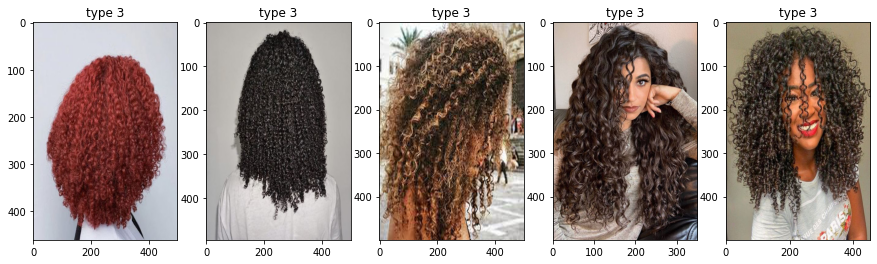

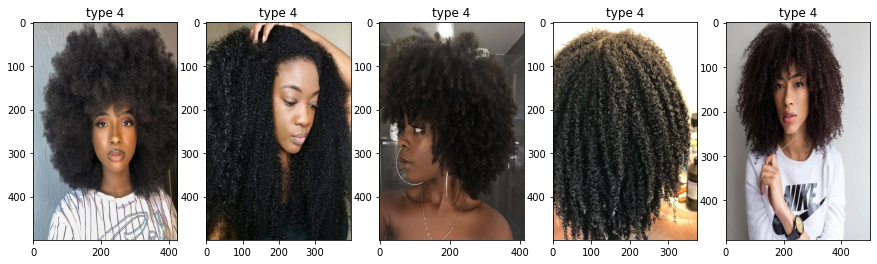

In [6]:
plt.figure(figsize=(15,4))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = type3_imgs[i]
    plt.imshow(img, aspect = "auto")
    plt.title("type 3")
plt.show()

plt.figure(figsize=(15,4))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = type4_imgs[i]
    plt.imshow(img, aspect = "auto")
    plt.title("type 4")
plt.show()

On a bien des hauteurs fixes.  
On convertit tout ça en numpy arrays et en rgb (3 canaux, on supprime brutalement le 4ème canal = alpha)

On a des rgba et des rgb, il faut convertir les formats.

In [7]:
type3_imgs_rgb = []
type4_imgs_rgb = []
for img in type3_imgs:
    type3_imgs_rgb.append(np.array(img)[:,:,:3])
for img in type4_imgs:
    type4_imgs_rgb.append(np.array(img)[:,:,:3])

In [8]:
print(type3_imgs_rgb[0].shape)
print(type4_imgs_rgb[0].shape)

(461, 500, 3)
(500, 426, 3)


On veut des images carrés de resizing_dim*resizing_dim

In [9]:
type3_imgs_squared = []
type4_imgs_squared = []

for img in type3_imgs_rgb:
    ht, wd, cc= img.shape

    # create new image of desired size and color (white) for padding
    ww = resizing_dim
    hh = resizing_dim
    color = (255,255,255)
    result = np.full((hh,ww,cc), color, dtype=np.uint8)

    # compute center offset
    xx = (ww - wd) // 2
    yy = (hh - ht) // 2

    # copy img image into center of result image
    result[yy:yy+ht, xx:xx+wd] = img
    type3_imgs_squared.append(result)

for img in type4_imgs_rgb:
    ht, wd, cc= img.shape

    # create new image of desired size and color (white) for padding
    ww = resizing_dim
    hh = resizing_dim
    color = (255,255,255)
    result = np.full((hh,ww,cc), color, dtype=np.uint8)

    # compute center offset
    xx = (ww - wd) // 2
    yy = (hh - ht) // 2

    # copy img image into center of result image
    result[yy:yy+ht, xx:xx+wd] = img
    type4_imgs_squared.append(result)

In [10]:
print(type3_imgs_squared[0].shape)
print(type4_imgs_squared[0].shape)

(500, 500, 3)
(500, 500, 3)


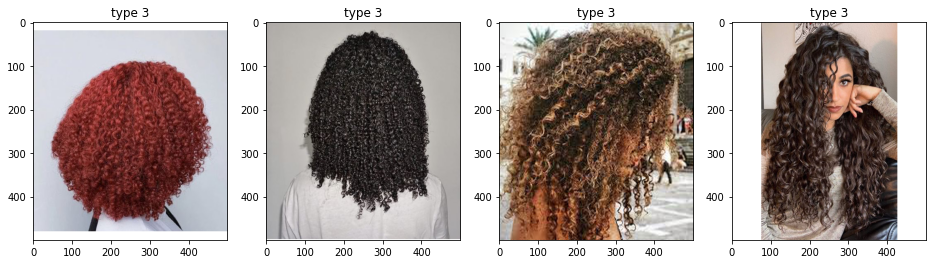

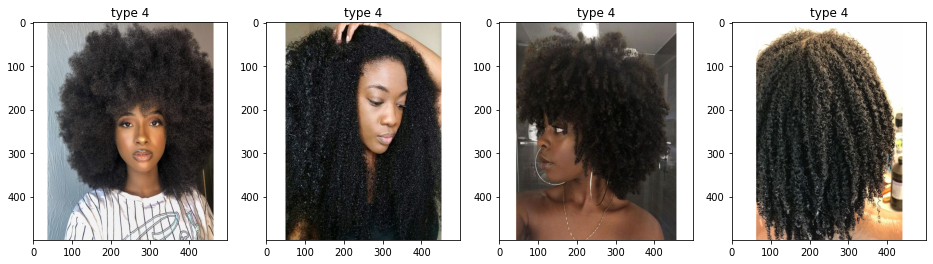

In [11]:
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    img = type3_imgs_squared[i]
    plt.imshow(img, aspect = "auto")
    plt.title("type 3")
plt.show()

plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    img = type4_imgs_squared[i]
    plt.imshow(img, aspect = "auto")
    plt.title("type 4")
plt.show()

## Creation of the dataset

In [12]:
type3_labels = np.full((len(type3_imgs_squared),),3)
type4_labels = np.full((len(type4_imgs_squared),),4)

In [13]:
type3_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [14]:
type3_labels.shape

(197,)

In [15]:
type3_imgs_squared[1].shape

(500, 500, 3)

In [16]:
len(type3_imgs_squared)

197

In [19]:
type3_imgs_squared = np.asarray(type3_imgs_squared)
type3_imgs_squared.shape

(197, 500, 500, 3)

In [20]:
type4_imgs_squared = np.asarray(type4_imgs_squared)
type4_imgs_squared.shape

(203, 500, 500, 3)

In [21]:
concat_imgs = np.concatenate((type3_imgs_squared, type4_imgs_squared))
concat_imgs.shape

(400, 500, 500, 3)

In [22]:
labels = np.concatenate((type3_labels, type4_labels))
labels.shape

(400,)

In [23]:
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = numpy.random.permutation(len(a))
    return a[p], b[p]

In [24]:
from sklearn.model_selection import train_test_split

## Model